#  Sentiment shifts in historical speech analysis

# Task
Tell me about this dataset.

Here is all the data you need:
"1presidential_speeches_with_metadata.xlsx"

## Data loading

### Subtask:
Load the dataset "1presidential_speeches_with_metadata.xlsx" into a pandas DataFrame.


**INSTALLING LIBRARIES :**

In [ ]:
%pip install vaderSentiment
%pip install pandas
%pip install matplotlib
%pip install seaborn

**IMPORT STATMENTS :**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**UPLOAD FILE :**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1presidential_speeches_with_metadata.xlsx to 1presidential_speeches_with_metadata.xlsx


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('1presidential_speeches_with_metadata.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: File '1presidential_speeches_with_metadata.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,President,Party,from,until,Vice President,title,date,info,speech
0,Donald Trump,Republican,2017,2021,1.0,"January 8, 2020: Statement on Iran",2020-01-08 00:00:00,After the killing of General Qasem Soleimani o...,As long as I am President of the United States...
1,Donald Trump,Republican,2017,2021,1.0,"January 3, 2020: Remarks on the Killing of Qas...",2020-01-03 00:00:00,President Trump announces that the US military...,"Hello, everybody. Well, thank you very much. ..."
2,Donald Trump,Republican,2017,2021,1.0,"October 27, 2019: Statement on the the Death o...",2019-10-27 00:00:00,President Donald Trump announces the death of ...,"Last night, the United States brought the worl..."
3,Donald Trump,Republican,2017,2021,1.0,"September 25, 2019: Press Conference",2019-09-25 00:00:00,President Donald Trump holds a press conferenc...,PRESIDENT TRUMP: Thank you very much. Thank...
4,Donald Trump,Republican,2017,2021,1.0,"September 24, 2019: Remarks at the United Nati...",2019-09-24 00:00:00,President Donald Trump speaks to the 74th sess...,PRESIDENT TRUMP: Thank you very much. Mr. ...


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset's characteristics, including data types, missing values, descriptive statistics, and potential outliers.



In [ ]:
# Data Dimensions and Types
print("Data Dimensions:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Descriptive Statistics
print("\nDescriptive Statistics:")
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"\nColumn: {col}")
        print(df[col].describe())
    else:
        print(f"\nColumn: {col}")
        print(f"Unique values: {df[col].nunique()}")
        print(df[col].value_counts())

# Potential Outliers (for numerical columns)
print("\nPotential Outliers (using IQR for numerical columns):")
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nColumn: {col}")
        print(f"Number of outliers: {len(outliers)}")
        if not outliers.empty:
            print("Outlier values:")
            print(outliers[col])

Data Dimensions:
Number of rows: 995
Number of columns: 9

Data Types:
President          object
Party              object
from                int64
until               int64
Vice President    float64
title              object
date               object
info               object
speech             object
dtype: object

Missing Values:
President         0
Party             0
from              0
until             0
Vice President    0
title             0
date              0
info              0
speech            0
dtype: int64

Percentage of Missing Values:
President         0.0
Party             0.0
from              0.0
until             0.0
Vice President    0.0
title             0.0
date              0.0
info              0.0
speech            0.0
dtype: float64

Descriptive Statistics:

Column: President
Unique values: 45
President
Lyndon B. Johnson        71
Ronald Reagan            59
Barack Obama             50
Franklin D. Roosevelt    49
John F. Kennedy          44
George W. Bush 

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset (update the path as needed)
df = pd.read_excel("1presidential_speeches_with_metadata.xlsx")  # or read_excel()

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each speech and add scores
df['compound'] = df['speech'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Classify based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)
df.head()

,President,Party,from,until,Vice President,title,date,info,speech,compound,sentiment
0,Donald Trump,Republican,2017,2021,1.0,"January 8, 2020: Statement on Iran",2020-01-08 00:00:00,After the killing of General Qasem Soleimani o...,As long as I am President of the United States...,-0.9668,Negative
1,Donald Trump,Republican,2017,2021,1.0,"January 3, 2020: Remarks on the Killing of Qas...",2020-01-03 00:00:00,President Trump announces that the US military...,"Hello, everybody. Well, thank you very much. ...",-0.7418,Negative
2,Donald Trump,Republican,2017,2021,1.0,"October 27, 2019: Statement on the the Death o...",2019-10-27 00:00:00,President Donald Trump announces the death of ...,"Last night, the United States brought the worl...",-0.9987,Negative
3,Donald Trump,Republican,2017,2021,1.0,"September 25, 2019: Press Conference",2019-09-25 00:00:00,President Donald Trump holds a press conferenc...,PRESIDENT TRUMP: Thank you very much. Thank...,1.0000,Positive
4,Donald Trump,Republican,2017,2021,1.0,"September 24, 2019: Remarks at the United Nati...",2019-09-24 00:00:00,President Donald Trump speaks to the 74th sess...,PRESIDENT TRUMP: Thank you very much. Mr. ...,0.9999,Positive


## Data analysis

### Subtask:
Analyze the dataset to gain deeper insights into the relationships between variables.


**Reasoning**:
Analyze the frequency distribution of categorical variables, investigate the temporal distribution of speeches, and explore potential relationships between the 'Party' and speech content.  Also examine the relationship between the 'President' and speech length.  Generate visualizations for these analyses.



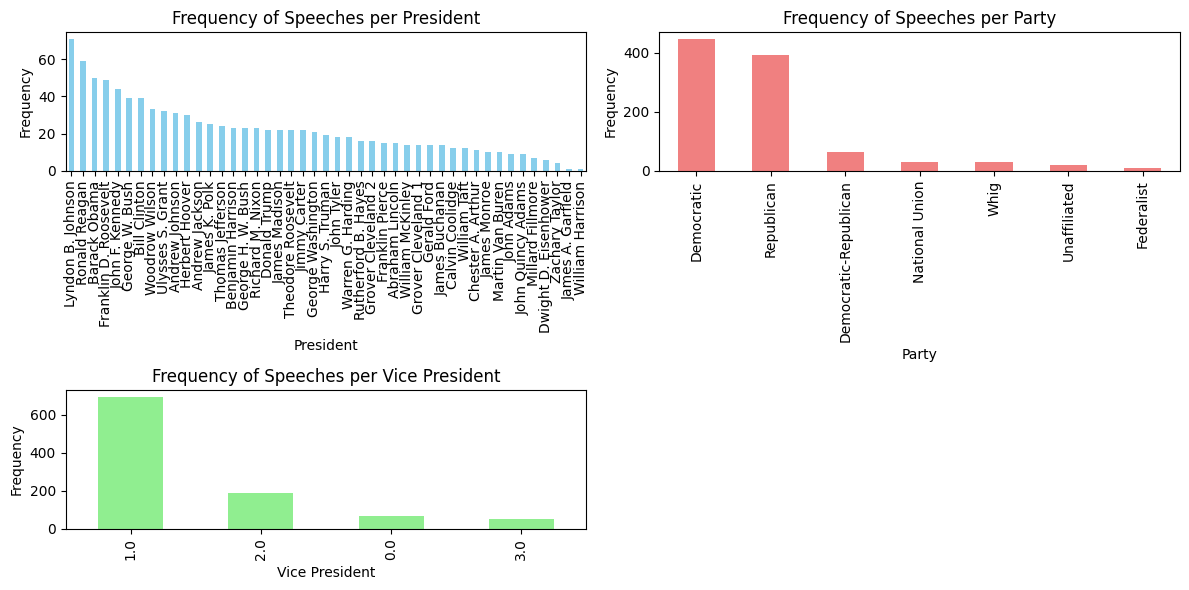

<ipython-input-3-f263bafc7aa8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


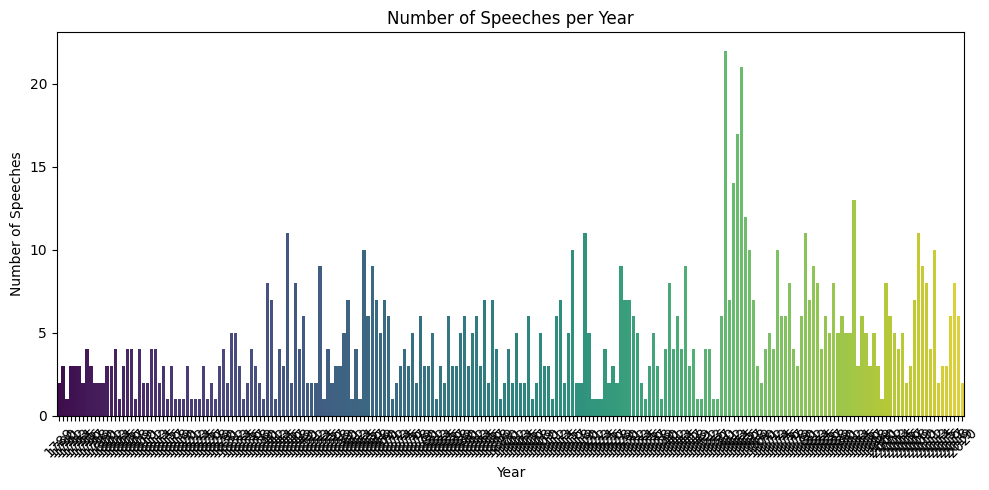

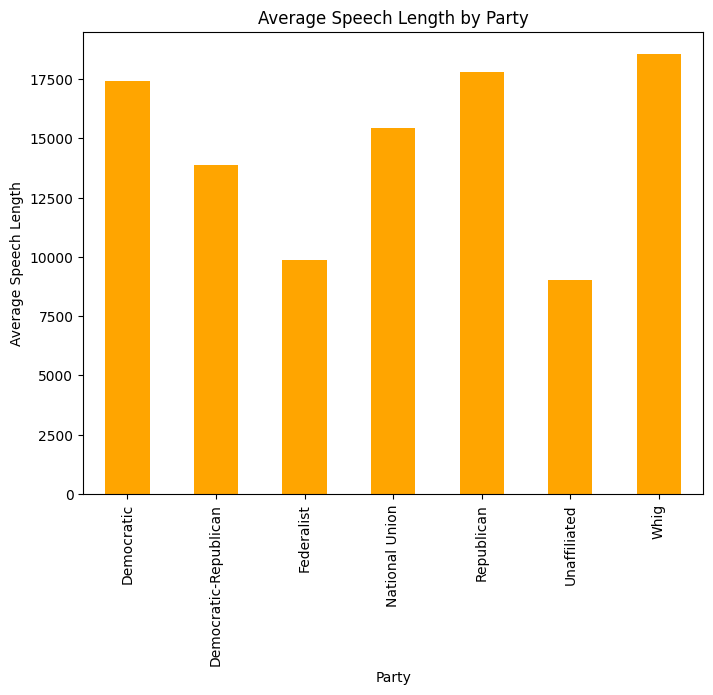

<ipython-input-3-f263bafc7aa8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='President', y='speech_length', data=df, palette='Set3')


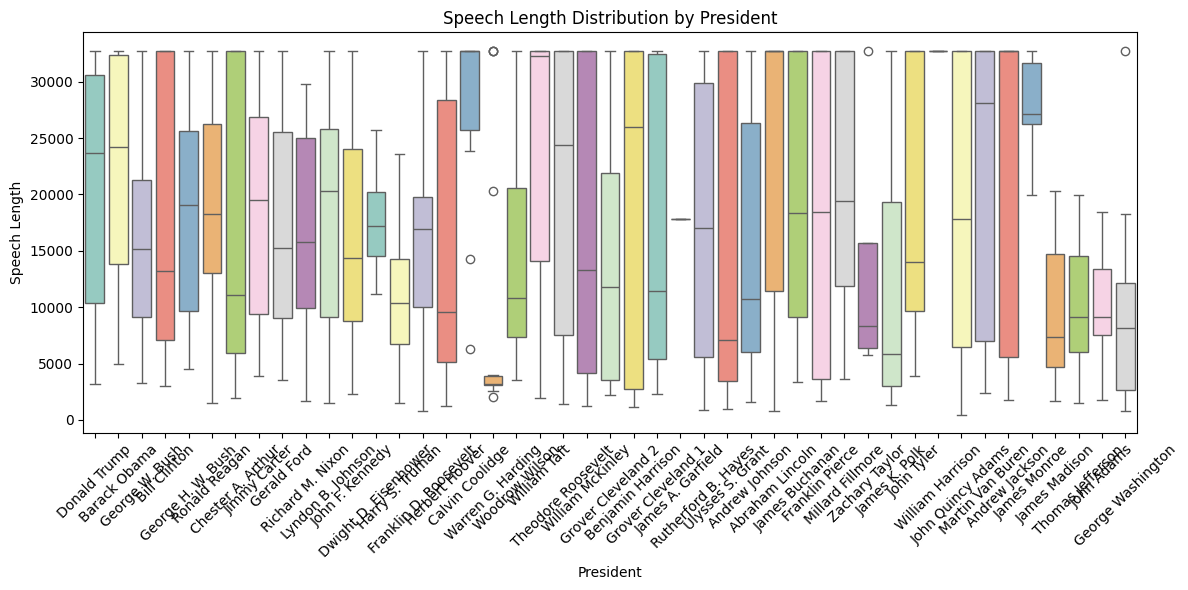

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency distribution of categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
df['President'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Speeches per President')
plt.xlabel('President')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df['Party'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Speeches per Party')
plt.xlabel('Party')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
df['Vice President'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Speeches per Vice President')
plt.xlabel('Vice President')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Temporal distribution of speeches
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Speeches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship between Party and speech content (simplified example)
# (More advanced techniques like word clouds or topic modeling would require additional libraries.)
party_speech_lengths = df.groupby('Party')['speech'].apply(lambda x: x.str.len().mean())
plt.figure(figsize=(8, 6))
party_speech_lengths.plot(kind='bar', color='orange')
plt.title('Average Speech Length by Party')
plt.xlabel('Party')
plt.ylabel('Average Speech Length')
plt.show()

# Relationship between President and speech length
df['speech_length'] = df['speech'].str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(x='President', y='speech_length', data=df, palette='Set3')
plt.title('Speech Length Distribution by President')
plt.xlabel('President')
plt.ylabel('Speech Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize key aspects of the dataset to complement the findings from the data exploration and analysis steps.


**Reasoning**:
The previous subtask already generated some visualizations.  I will now create additional visualizations as per the instructions, focusing on relationships between variables, and improving the presentation of existing visualizations.



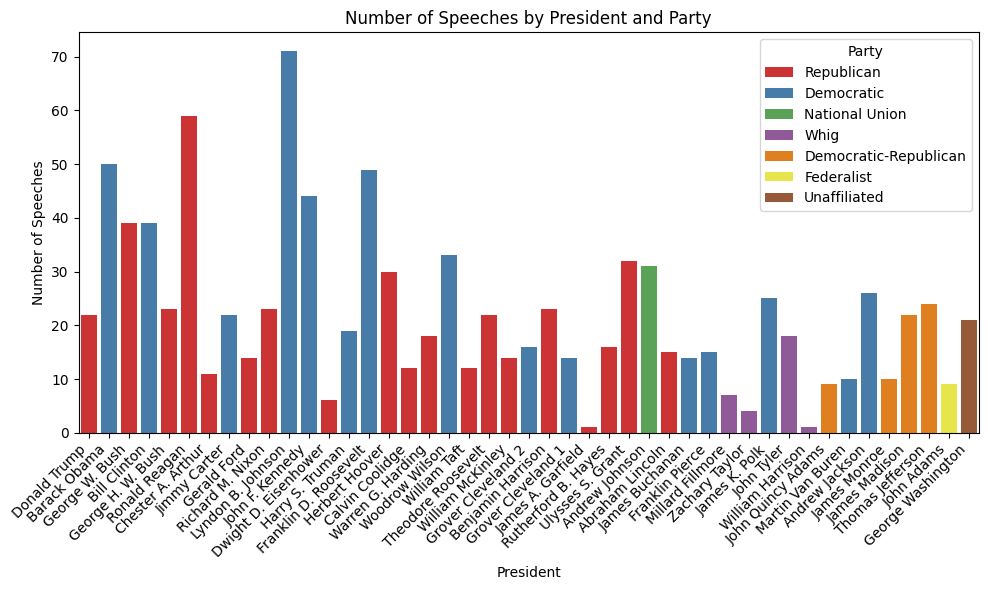

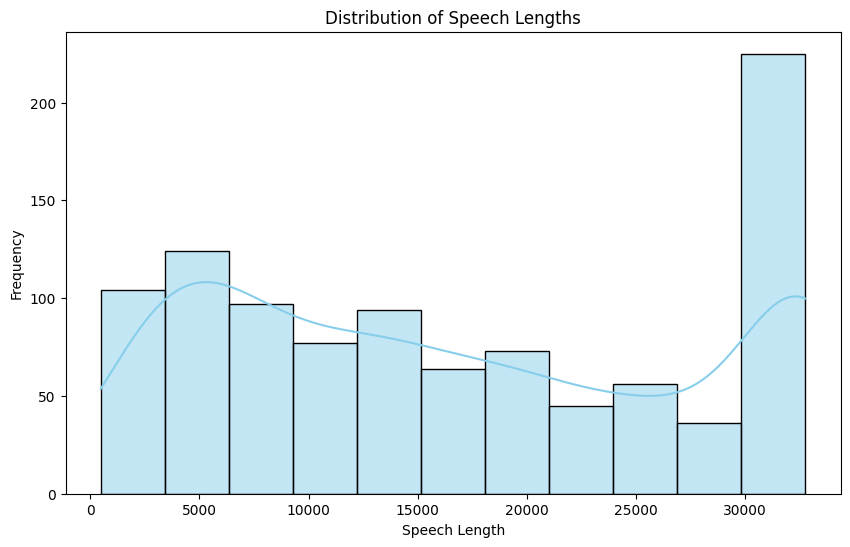

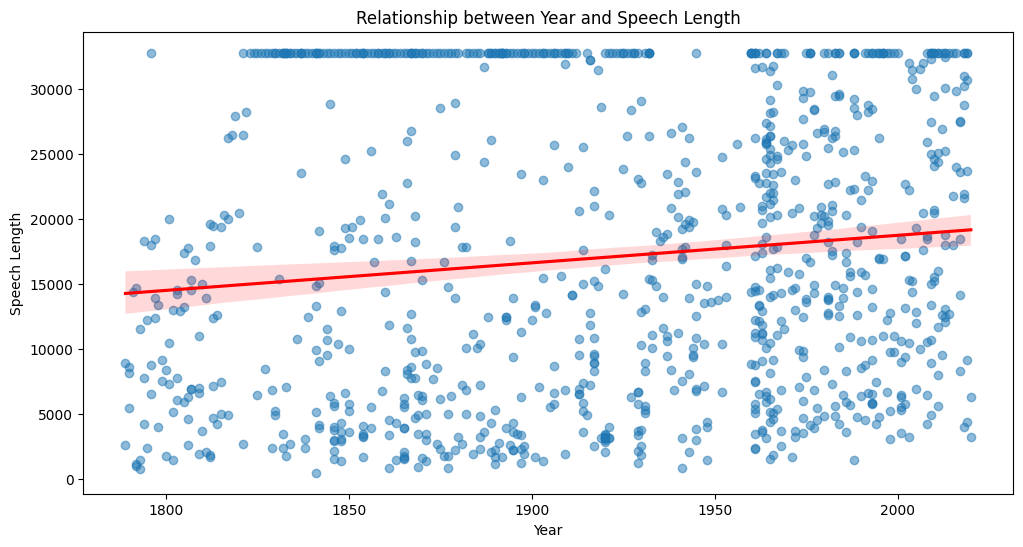

<ipython-input-4-0b2f6dbe6782>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


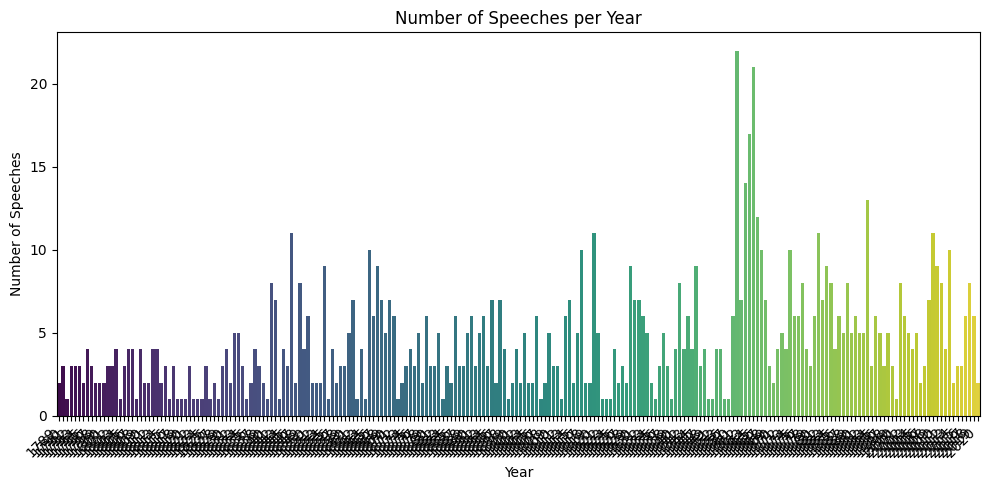

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between 'President' and 'Party'
plt.figure(figsize=(10, 6))
sns.countplot(x='President', hue='Party', data=df, palette='Set1')
plt.title('Number of Speeches by President and Party')
plt.xlabel('President')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of speech lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['speech_length'], kde=True, color='skyblue')
plt.title('Distribution of Speech Lengths')
plt.xlabel('Speech Length')
plt.ylabel('Frequency')
plt.show()

# Relationship between year and speech length
plt.figure(figsize=(12,6))
sns.regplot(x='year', y='speech_length', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Year and Speech Length')
plt.xlabel('Year')
plt.ylabel('Speech Length')
plt.show()

# Improve the existing plot of Number of Speeches per Year
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Speeches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

The provided data analysis task does not explicitly pose questions. However, the analysis implicitly explores questions like:

* How many speeches were given by each president?
* What is the distribution of speeches across different political parties?
* How has the frequency of presidential speeches changed over time?
* Is there a correlation between the length of a speech and the president who delivered it or the political party?
* What is the typical length of a presidential speech?
* Is there a relationship between the year and the speech length?

### 2. Data Analysis Key Findings

* **Data Characteristics:** The dataset contains information on 995 presidential speeches across 9 columns with no missing values.
* **Speech Frequency:**  Visualizations show the frequency of speeches per president, party, and vice president, allowing for identification of the most active speakers and parties.
* **Temporal Trends:**  The number of speeches per year reveals trends in speech frequency over time, and the relationship between year and speech length suggests a potential trend, but requires further investigation.
* **Speech Length Variations:** The average speech length varies across political parties and presidents, as shown by bar and box plots, respectively. The distribution of speech lengths shows the typical length of speeches and possible outliers.
* **President-Party Relationship:** The combined visualization of president and party affiliation reveals which parties held the presidency more often during the observed period.

### 3. Insights or Next Steps

* **Deepen Temporal Analysis:** Explore the relationship between the year and speech length with more advanced statistical methods (e.g., time series analysis) to identify significant trends or turning points.
* **Text Analysis:** Perform text analysis (e.g., sentiment analysis, topic modeling) on the 'speech' column to gain deeper insights into the content and themes of the speeches, potentially correlating them with historical events, political climate, or other variables.
